# Wine Quality Prediction using DecisionTreeClassifier

## Get the data from scikit datasets

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine Quality dataset
wine_data = load_wine()

# Convert to DataFrame for exploration (optional)
dataset = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
dataset['target'] = wine_data.target


In [ ]:
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
dataset["target"].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [ ]:
# Check for missing values
print(dataset.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


# Split the data and normalize it

In [ ]:
# importing
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Clean data
dataset = dataset.dropna()

column_list = list(dataset.columns)
target_column = "target"

features_to_normalize = [col for col in column_list if col != target_column]
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), features_to_normalize),
    remainder='passthrough'
    )


# Create X & y
X = dataset.drop('target', axis=1)
y = dataset["target"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_normal, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test_normal)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9444444444444444


In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- color_intensity <= 0.18
|   |--- proline <= 0.57
|   |   |--- ash <= 0.91
|   |   |   |--- class: 1
|   |   |--- ash >  0.91
|   |   |   |--- class: 0
|   |--- proline >  0.57
|   |   |--- class: 0
|--- color_intensity >  0.18
|   |--- flavanoids <= 0.22
|   |   |--- class: 2
|   |--- flavanoids >  0.22
|   |   |--- proline <= 0.35
|   |   |   |--- alcohol <= 0.56
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  0.56
|   |   |   |   |--- class: 0
|   |   |--- proline >  0.35
|   |   |   |--- class: 0



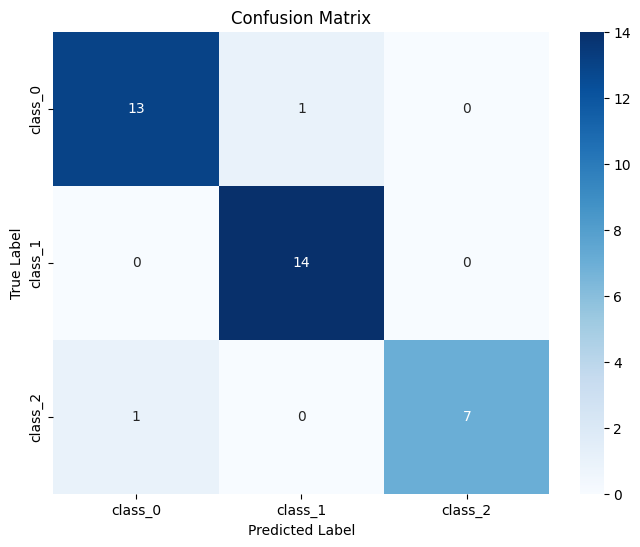

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

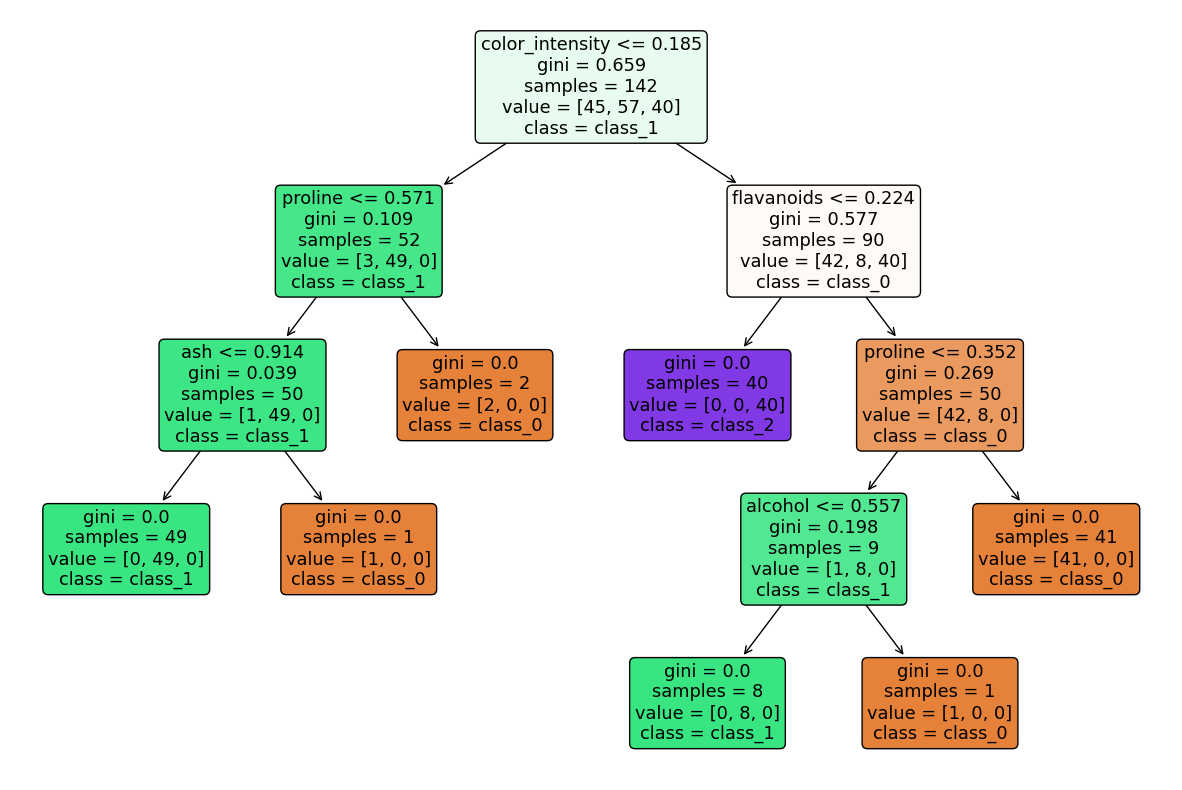

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=wine_data.target_names, filled=True, rounded=True)
plt.show()